<a href="https://colab.research.google.com/github/BharatXBhalla/Deep-Learning-CDAC/blob/main/Ann/05_MultiLayerPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
dataset = load_iris()

In [28]:
df_flower =  pd.DataFrame(dataset["data"],columns=dataset["feature_names"])
df_flower.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [29]:
df_flower["flower_name"] = pd.DataFrame(dataset['target']).iloc[:,0].map({0:'sentosa',1:'vacikala',2:'verginika'})

In [30]:
df_flower.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower_name
0,5.1,3.5,1.4,0.2,sentosa
1,4.9,3.0,1.4,0.2,sentosa
2,4.7,3.2,1.3,0.2,sentosa
3,4.6,3.1,1.5,0.2,sentosa
4,5.0,3.6,1.4,0.2,sentosa


In [34]:
from sklearn.model_selection import train_test_split
X = df_flower.iloc[:,:-1]
Y = df_flower.iloc[:,-1]

xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=1)

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()
xtrain_transform = scaler.fit_transform(xtrain)
xtest_transform = scaler.fit_transform(xtest)

In [36]:
from sklearn.neural_network import MLPClassifier

In [37]:
model = MLPClassifier(hidden_layer_sizes=(150,100,45),activation='relu',max_iter=300,solver="adam")

In [38]:
model.fit(xtrain_transform,ytrain)

MLPClassifier(hidden_layer_sizes=(150, 100, 45), max_iter=300)

In [39]:
ypred=model.predict(xtest_transform)

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [41]:
accuracy = accuracy_score(ytest,ypred)
accuracy

0.9777777777777777

In [42]:
cm=confusion_matrix(ytest,ypred)

In [43]:
cm

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 13]])

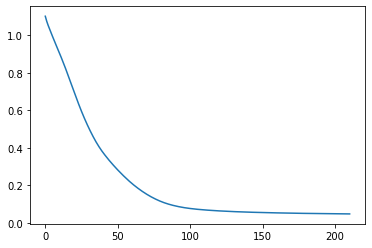

In [44]:
plt.plot(model.loss_curve_)